In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import plot_model

In [2]:
df = pd.read_csv("water_leak_detection_1000_rows.csv")

In [3]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 Timestamp           0
Sensor_ID           0
Pressure (bar)      0
Flow Rate (L/s)     0
Temperature (°C)    0
Leak Status         0
Burst Status        0
dtype: int64


In [4]:
df.drop(columns=['Leak Status'], inplace=True)

In [5]:
le = LabelEncoder()
df['Sensor_ID'] = le.fit_transform(df['Sensor_ID'])

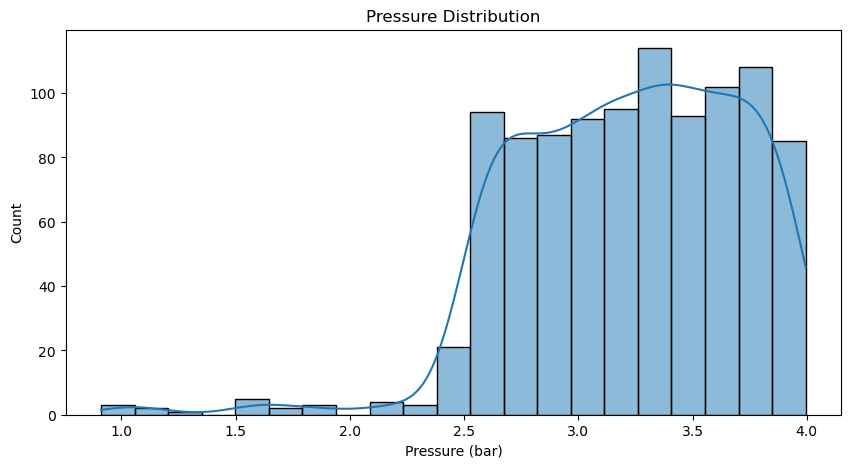

In [6]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Pressure (bar)'], kde=True)
plt.title("Pressure Distribution")
plt.show()

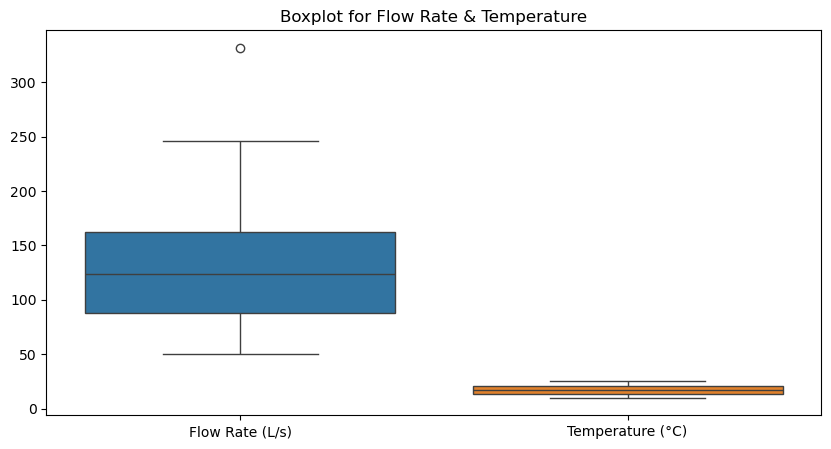

In [7]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['Flow Rate (L/s)', 'Temperature (°C)']])
plt.title("Boxplot for Flow Rate & Temperature")
plt.show()

In [8]:
X = df[['Sensor_ID', 'Pressure (bar)', 'Flow Rate (L/s)', 'Temperature (°C)']]
y = df['Burst Status']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.995


In [12]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.995


In [13]:
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [14]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
history = model.fit(X_train_scaled, y_train, epochs=30, batch_size=16, validation_split=0.2, verbose=1)

Epoch 1/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.5422 - loss: 0.6670 - val_accuracy: 0.9937 - val_loss: 0.2549
Epoch 2/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9838 - loss: 0.2199 - val_accuracy: 0.9937 - val_loss: 0.0849
Epoch 3/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9881 - loss: 0.1071 - val_accuracy: 0.9937 - val_loss: 0.0540
Epoch 4/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9848 - loss: 0.0911 - val_accuracy: 0.9937 - val_loss: 0.0422
Epoch 5/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9785 - loss: 0.1008 - val_accuracy: 0.9937 - val_loss: 0.0348
Epoch 6/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9923 - loss: 0.0406 - val_accuracy: 0.9937 - val_loss: 0.0300
Epoch 7/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9941 - loss: 0.0296 - val_accuracy: 0.9937 - val_loss: 0.0252
Epoch 8/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9931 - loss: 0.0227 - val_accuracy: 0.9937 - val_los

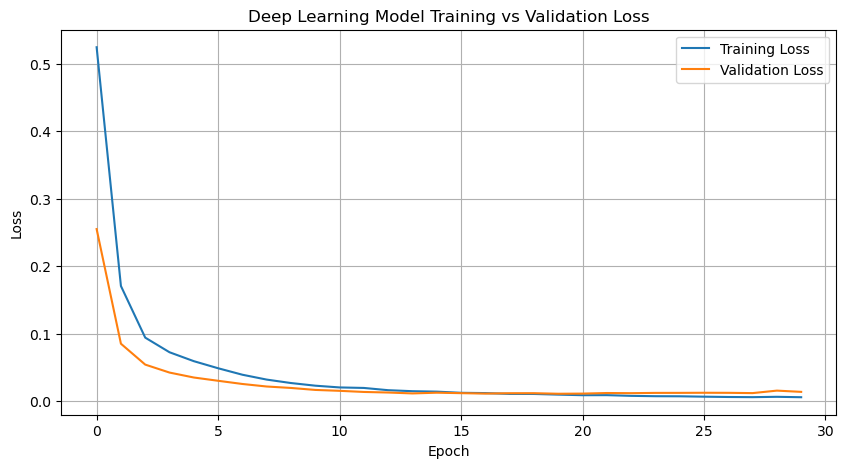

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Deep Learning Model Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()